In [167]:
# Standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.decomposition import PCA

# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
path1p = os.path.dirname(currentdir)
path2p = os.path.dirname(path1p)
libpath = os.path.join(path1p, "lib")
pwd_mat = os.path.join(os.path.join(path2p, "data/"), "sim_ds_mat")
pwd_h5 = os.path.join(os.path.join(path2p, "data/"), "sim_ds_h5")

sys.path.insert(0, libpath)
print("Appended library directory", libpath)

# User libraries
from matlab.matlab_yaro_lib import read_mat
from corr_lib import sprMat
from qt_wrapper import gui_fpath

Appended library directory /media/aleksejs/DataHDD/work/codes/theoretical-models/experimental-bridge/nest-mesoscopic-metric-test/codes/lib


## 0. Loading data

In [3]:
# Read LVM file from command line
data_path = gui_fpath("Select data directory", "./")
data, behaviour = read_mat(data_path)

# Get parameters
nTrials, nTimes, nChannels = data.shape
print("Loaded neuronal data with (nTrials, nTimes, nChannels)=", data.shape)

Reading Yaro data from /mnt/hifo_scratch1/Yaro/data_for_TE/mtp/mtp_15/mtp_15_2018_05_16_a
Loaded neuronal data with (nTrials, nTimes, nChannels)= (338, 201, 12)


# PCA model

Let's check how much information there is in the data

Strategy
1. Flatten vars=times x channels, so resulting data is trials x vars
2. Do PCA, plot sorted eigs

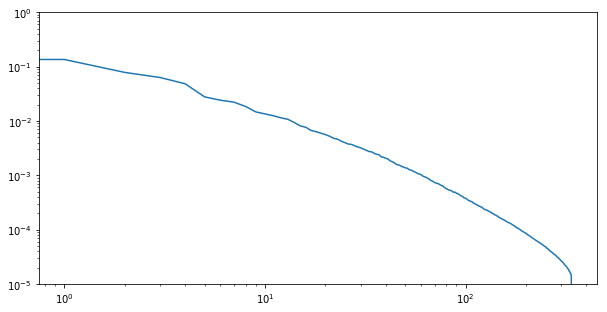

In [176]:
pca = PCA()
pca.fit(data.reshape(nTrials, nTimes*nChannels))
exp_var = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.loglog(np.flip(np.sort(exp_var)))
plt.ylim([1.0e-5, 1.0])
plt.show()